# Accessing Water Data
- [Water Point Data Exchange Website](https://www.waterpointdata.org/)
- [API Guide and Dictionary](https://dev.socrata.com/foundry/data.waterpointdata.org/eqje-vguj)
- [Documentation](https://www.waterpointdata.org/docs/WPdx_User_Guide.pdf)

In [11]:
# importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages.py


In [12]:
# import useful functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py

In [13]:
# fetching hidden api key from desktop stored under 'water_api_key'
%run /Users/thomasadler/Desktop/futuristic-platipus/keys.py

In [14]:
# defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

In [15]:
# setting API endpoint, dataset, key and client profile
socrata_domain = 'data.waterpointdata.org'
socrata_dataset_identifier = 'eqje-vguj'
socrata_token = os.environ.get(water_api_key)
client = Socrata(socrata_domain, socrata_token, timeout=10)

The goal is to access every water point recorded in Uganda and their associated information.

In [16]:
# creating query to fetch Uganda water points, all columns included
water_uganda_query = """
select
    *
where
    clean_country_name = 'Uganda'
limit
    200000
"""

In [17]:
# query dataset and store in dataframe
results = client.get(socrata_dataset_identifier, query=water_uganda_query)
water_df = pd.DataFrame.from_records(results)

In [18]:
# keep raw dataset untouched
uganda_water_df = water_df.copy()

In [19]:
# short look at data
uganda_water_df.tail()

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_tech_clean,_water_tech_category,facility_type,clean_country_name,...,notes,rehab_priority,photo_lnk,lat_deg_original,lon_deg_original,fecal_coliform_presence,pay,scheme_id,orig_lnk,fecal_coliform_value
108252,270292,youthmappers,2.8520073,32.3231249,2022-05-18T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ngom_rom,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
108253,421099,Water4,0.783063923,33.426149078,2022-04-27T00:00:00.000,Unknown,NaN,NaN,Improved,Uganda,...,NaN,176,https://api.mwater.co/v3/images/e6a1c51282e440...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108254,269987,youthmappers,2.8824498,32.2743901,2022-05-23T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ayac,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108255,270258,youthmappers,2.7894498,32.3490701,2022-05-19T00:00:00.000,Yes,Tapstand,Tapstand,Improved,Uganda,...,gulu_ptc,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108256,419716,Water4,0.784164132,33.516908912,2022-06-17T00:00:00.000,Yes,NaN,NaN,Improved,Uganda,...,NaN,88,https://api.mwater.co/v3/images/6617ff9975f349...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# looking at column datatypes
uganda_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   row_id                     108257 non-null  object
 1   source                     108257 non-null  object
 2   lat_deg                    108257 non-null  object
 3   lon_deg                    108257 non-null  object
 4   report_date                108257 non-null  object
 5   status_id                  108257 non-null  object
 6   water_tech_clean           25659 non-null   object
 7   _water_tech_category       25659 non-null   object
 8   facility_type              108257 non-null  object
 9   clean_country_name         108257 non-null  object
 10  clean_adm1                 108257 non-null  object
 11  clean_adm2                 108257 non-null  object
 12  clean_adm3                 108257 non-null  object
 13  clean_adm4                 108257 non-null  

We exclude columns which have already been cleaned by the WPD team and stored in another "clean" column. We also exclude columns with links and urls. 

In [21]:
# drop irrelevant columns
uganda_water_df_clean = pd.DataFrame(uganda_water_df.drop(columns=['clean_country_id', 'activity_id', 'adm1', 'adm2', 'adm3', 'country_id',
                                                                   'country_name', 'status', 'water_source', 'management',
                                                                   'water_tech', 'orig_lnk', 'photo_lnk', 'data_lnk',
                                                                   'public_data_source', 'converted', 'created_timestamp',
                                                                   'days_since_report', 'updated']))

# check current columns
uganda_water_df_clean.columns

Index(['row_id', 'source', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
       'water_tech_clean', '_water_tech_category', 'facility_type',
       'clean_country_name', 'clean_adm1', 'clean_adm2', 'clean_adm3',
       'clean_adm4', 'distance_to_primary', 'distance_to_secondary',
       'distance_to_tertiary', 'distance_to_city', 'distance_to_town',
       'usage_cap', 'is_urban', 'staleness_score', 'is_latest', 'location_id',
       'cluster_size', 'new_georeferenced_column_', 'lat_lon_deg', 'count',
       'water_source_clean', 'water_source_category', 'wpdx_id',
       'install_year', 'management_clean', 'status_clean', 'installer',
       'served_population', 'local_population', 'crucialness', 'pressure',
       'subjective_quality', 'notes', 'rehab_priority', 'lat_deg_original',
       'lon_deg_original', 'fecal_coliform_presence', 'pay', 'scheme_id',
       'fecal_coliform_value'],
      dtype='object')

In [22]:
# checking contents of columns we want to convert to binary
print('fecal_coliform_presence distribution:',
      uganda_water_df_clean['fecal_coliform_presence'].value_counts())
print('is_latest distribution:',
      uganda_water_df_clean['is_latest'].value_counts())
print('is_urban distribution:',
      uganda_water_df_clean['is_urban'].value_counts())
print('status_id distribution:',
      uganda_water_df_clean['status_id'].value_counts())

fecal_coliform_presence distribution: Present    1035
Absent      275
Name: fecal_coliform_presence, dtype: int64
is_latest distribution: True     96575
False    11682
Name: is_latest, dtype: int64
is_urban distribution: False    105553
True       2704
Name: is_urban, dtype: int64
status_id distribution: Yes        87016
No         18666
Unknown     2575
Name: status_id, dtype: int64


We assume that water points that have an unknown status, are not working.

In [23]:
# convert to binary
uganda_water_df_clean['fecal_coliform_presence'] = uganda_water_df_clean[
    'fecal_coliform_presence'].map({
        'Present': 1,
        'Absent': 0
    })

uganda_water_df_clean['is_latest'] = uganda_water_df_clean['is_latest'].astype(
    'int64')

uganda_water_df_clean['is_urban'] = uganda_water_df_clean['is_urban'].map({
    True:
    1,
    False:
    0
})

uganda_water_df_clean['status_id'] = uganda_water_df_clean['status_id'].map({
    'Yes':
    1,
    'No':
    0,
    'Unknown':
    0
})

# check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  object 
 3   lon_deg                    108257 non-null  object 
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [24]:
# convert to number
num_columns = ['distance_to_city', 'distance_to_primary', 'lat_deg', 'lat_deg_original',
               'lon_deg', 'lon_deg_original', 'distance_to_secondary', 'distance_to_tertiary',
               'distance_to_town', 'fecal_coliform_value', 'cluster_size', 'count', 'crucialness',
               'install_year', 'local_population', 'pressure',
               'rehab_priority', 'served_population', 'staleness_score', 'usage_cap']

for col in num_columns:
    float_converter(uganda_water_df_clean, col)
# check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  float32
 3   lon_deg                    108257 non-null  float32
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [44]:
# convert to datetime
date_converter(uganda_water_df_clean, 'report_date')
uganda_water_df_clean['install_year']=pd.to_datetime(uganda_water_df_clean['install_year'], format="%Y")


# check
print(uganda_water_df_clean['report_date'].head())
print(uganda_water_df_clean['install_year'].head())

0   2005-09-07
1   2005-09-07
2   2005-09-07
3   2005-09-07
4   2005-09-07
Name: report_date, dtype: datetime64[ns]
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: install_year, dtype: datetime64[ns]


2009-01-01    6056
2008-01-01    5936
2007-01-01    5924
2004-01-01    5119
2005-01-01    4710
              ... 
1924-01-01       2
1905-01-01       2
1933-01-01       2
2045-01-01       2
2043-01-01       1
Name: install_year, Length: 97, dtype: int64

In [26]:
# select columns with string
str_columns = list(uganda_water_df_clean.select_dtypes("object").columns)

# remove special characters from string columns
for col in str_columns:
    uganda_water_df_clean[col].str.replace('[^\w\s]', '')

In [27]:
# percentage of NA values by columns
uganda_water_df_clean.isna().mean() * 100

row_id                         0.000000
source                         0.000000
lat_deg                        0.000000
lon_deg                        0.000000
report_date                    0.000000
status_id                      0.000000
water_tech_clean              76.298068
_water_tech_category          76.298068
facility_type                  0.000000
clean_country_name             0.000000
clean_adm1                     0.000000
clean_adm2                     0.000000
clean_adm3                     0.000000
clean_adm4                     0.000000
distance_to_primary            0.000000
distance_to_secondary          0.000000
distance_to_tertiary           0.000000
distance_to_city               0.000000
distance_to_town               0.000000
usage_cap                      0.019398
is_urban                     100.000000
staleness_score                0.000000
is_latest                      0.000000
location_id                    0.000000
cluster_size                   0.000000


We decide to drop columns which have more than 50% of its values that are missing. We deem these columns not be of good enough quality to be analysed.

In [28]:
# remove columsn where >50% are missing values, using the thresh parameter (0.5)
uganda_water_df_clean = uganda_water_df_clean.dropna(
    axis=1, thresh=0.5 * len(uganda_water_df_clean))

# check
uganda_water_df_clean.isna().mean() * 100

row_id                        0.000000
source                        0.000000
lat_deg                       0.000000
lon_deg                       0.000000
report_date                   0.000000
status_id                     0.000000
facility_type                 0.000000
clean_country_name            0.000000
clean_adm1                    0.000000
clean_adm2                    0.000000
clean_adm3                    0.000000
clean_adm4                    0.000000
distance_to_primary           0.000000
distance_to_secondary         0.000000
distance_to_tertiary          0.000000
distance_to_city              0.000000
distance_to_town              0.000000
usage_cap                     0.019398
staleness_score               0.000000
is_latest                     0.000000
location_id                   0.000000
cluster_size                  0.000000
new_georeferenced_column_     0.000000
lat_lon_deg                   0.000000
count                         0.000000
water_source_clean       

The documentation informs us that this dataset is not supposed to have any duplicate columns or rows.

In [29]:
# checking duplicate rows
# uganda_water_df_clean.duplicated().sum()

In [30]:
# checking duplicate columns
# uganda_water_df_clean.T.duplicated().sum()

We impute the missing values in the remaining columns with the median for their administrative region. We first choose the lowest level, `clean_adm4`, then if there are remaining missing values we choose the second lowest `clean_adm3` and so on. We choose the median so that it is not too sensitive to outliers.

In [31]:
# choose numerical columns
uganda_water_df_clean_numerical = uganda_water_df_clean[
    uganda_water_df_clean.select_dtypes(exclude='object').columns]

# check
uganda_water_df_clean_numerical.head()

,lat_deg,lon_deg,report_date,status_id,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,usage_cap,staleness_score,is_latest,cluster_size,count,install_year,served_population,local_population,crucialness,pressure
0,0.158537,30.490643,2005-09-07,1,37666.023438,4875.484375,23.399448,45104.835938,32223.873047,250.0,14.422875,0,76.0,1.0,NaT,NaN,NaN,NaN,NaN
1,0.070597,30.415651,2005-09-07,1,35843.273438,2602.279297,971.238464,38419.558594,24194.054688,250.0,14.422875,0,8.0,1.0,NaT,NaN,NaN,NaN,NaN
2,0.158667,30.490551,2005-09-07,1,37651.726562,4860.169922,34.916096,45094.210938,32236.693359,250.0,14.422875,0,76.0,1.0,NaT,NaN,NaN,NaN,NaN
3,0.208128,30.386393,2005-09-07,1,24849.943359,4290.553223,38.743423,33706.121094,39617.296875,300.0,14.422875,0,5.0,1.0,NaT,NaN,NaN,NaN,NaN
4,-0.134680,30.351593,2005-09-07,1,29073.130859,6369.317871,3270.906982,45044.160156,16042.707031,250.0,14.422875,0,2.0,1.0,NaT,NaN,NaN,NaN,NaN


In [32]:
# choose columns with null values
null_cols = uganda_water_df_clean_numerical.isna().sum()
cols_to_impute = null_cols[null_cols > 0].index
cols_to_impute = cols_to_impute.drop('install_year')

# check
cols_to_impute

Index(['usage_cap', 'served_population', 'local_population', 'crucialness',
       'pressure'],
      dtype='object')

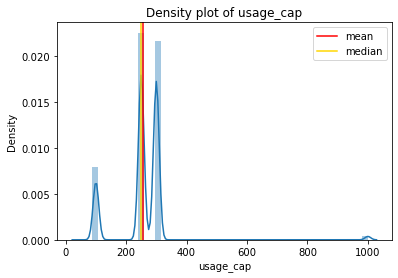

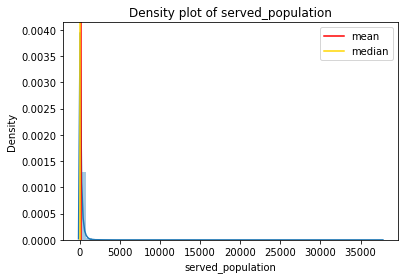

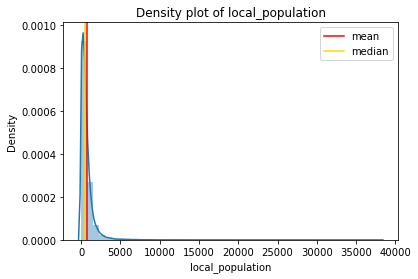

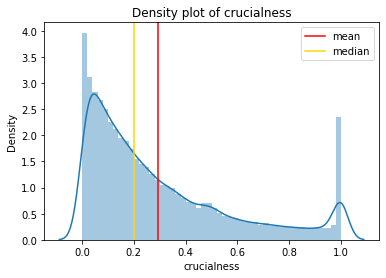

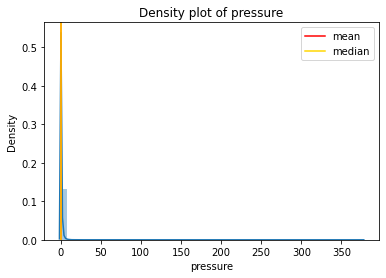

In [33]:
# showing distribution of value we want to inpute and where mean/median is situated
for col in cols_to_impute:
    plt.figure()
    sns.distplot(uganda_water_df_clean[col])
    plt.axvline(uganda_water_df_clean[col].mean(), c='r', label='mean')
    plt.axvline(uganda_water_df_clean[col].median(), c='gold', label='median')
    plt.legend()
    plt.title(f'Density plot of {col}')
    plt.show()

We can confirm that the median is the better choice as it represents our data better.

In [34]:
# fill missing values with adm4 median
for col in cols_to_impute:
    missing_to_regional_median(uganda_water_df_clean, col, 'clean_adm4')

# check
uganda_water_df_clean.isna().sum()

row_id                           0
source                           0
lat_deg                          0
lon_deg                          0
report_date                      0
status_id                        0
facility_type                    0
clean_country_name               0
clean_adm1                       0
clean_adm2                       0
clean_adm3                       0
clean_adm4                       0
distance_to_primary              0
distance_to_secondary            0
distance_to_tertiary             0
distance_to_city                 0
distance_to_town                 0
usage_cap                        0
staleness_score                  0
is_latest                        0
location_id                      0
cluster_size                     0
new_georeferenced_column_        0
lat_lon_deg                      0
count                            0
water_source_clean           17243
water_source_category        17243
wpdx_id                       1030
install_year        

In [35]:
# fill missing values with adm3 median
for col in cols_to_impute:
    missing_to_regional_median(uganda_water_df_clean, col, 'clean_adm3')

# check
uganda_water_df_clean.isna().sum()

row_id                           0
source                           0
lat_deg                          0
lon_deg                          0
report_date                      0
status_id                        0
facility_type                    0
clean_country_name               0
clean_adm1                       0
clean_adm2                       0
clean_adm3                       0
clean_adm4                       0
distance_to_primary              0
distance_to_secondary            0
distance_to_tertiary             0
distance_to_city                 0
distance_to_town                 0
usage_cap                        0
staleness_score                  0
is_latest                        0
location_id                      0
cluster_size                     0
new_georeferenced_column_        0
lat_lon_deg                      0
count                            0
water_source_clean           17243
water_source_category        17243
wpdx_id                       1030
install_year        

In [36]:
# fill missing values with adm2 median
for col in cols_to_impute:
    missing_to_regional_median(uganda_water_df_clean, col, 'clean_adm2')

# check
uganda_water_df_clean.isna().sum()

row_id                           0
source                           0
lat_deg                          0
lon_deg                          0
report_date                      0
status_id                        0
facility_type                    0
clean_country_name               0
clean_adm1                       0
clean_adm2                       0
clean_adm3                       0
clean_adm4                       0
distance_to_primary              0
distance_to_secondary            0
distance_to_tertiary             0
distance_to_city                 0
distance_to_town                 0
usage_cap                        0
staleness_score                  0
is_latest                        0
location_id                      0
cluster_size                     0
new_georeferenced_column_        0
lat_lon_deg                      0
count                            0
water_source_clean           17243
water_source_category        17243
wpdx_id                       1030
install_year        

In [37]:
# fill missing values with adm1 median
for col in cols_to_impute:
    missing_to_regional_median(uganda_water_df_clean, col, 'clean_adm1')

# check
uganda_water_df_clean.isna().sum()

row_id                           0
source                           0
lat_deg                          0
lon_deg                          0
report_date                      0
status_id                        0
facility_type                    0
clean_country_name               0
clean_adm1                       0
clean_adm2                       0
clean_adm3                       0
clean_adm4                       0
distance_to_primary              0
distance_to_secondary            0
distance_to_tertiary             0
distance_to_city                 0
distance_to_town                 0
usage_cap                        0
staleness_score                  0
is_latest                        0
location_id                      0
cluster_size                     0
new_georeferenced_column_        0
lat_lon_deg                      0
count                            0
water_source_clean           17243
water_source_category        17243
wpdx_id                       1030
install_year        

In [38]:
# fill the final null values with the median value of the whole country
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(
        uganda_water_df_clean[col].median())

# check remaining null values
uganda_water_df_clean.isna().sum()

row_id                           0
source                           0
lat_deg                          0
lon_deg                          0
report_date                      0
status_id                        0
facility_type                    0
clean_country_name               0
clean_adm1                       0
clean_adm2                       0
clean_adm3                       0
clean_adm4                       0
distance_to_primary              0
distance_to_secondary            0
distance_to_tertiary             0
distance_to_city                 0
distance_to_town                 0
usage_cap                        0
staleness_score                  0
is_latest                        0
location_id                      0
cluster_size                     0
new_georeferenced_column_        0
lat_lon_deg                      0
count                            0
water_source_clean           17243
water_source_category        17243
wpdx_id                       1030
install_year        

We will not fill the non-numeric columns that still have missing values as the proportion of missing values is too great (15-25%). We will decide what to do with them later in our analysis. We must do this with great care as omitting or filling these columns/rows will have a large impact on the dataset.

In [39]:
# export to cleaned dataset to csv
uganda_water_df_clean.to_csv(filepath + 'uganda_water_df_clean.csv')

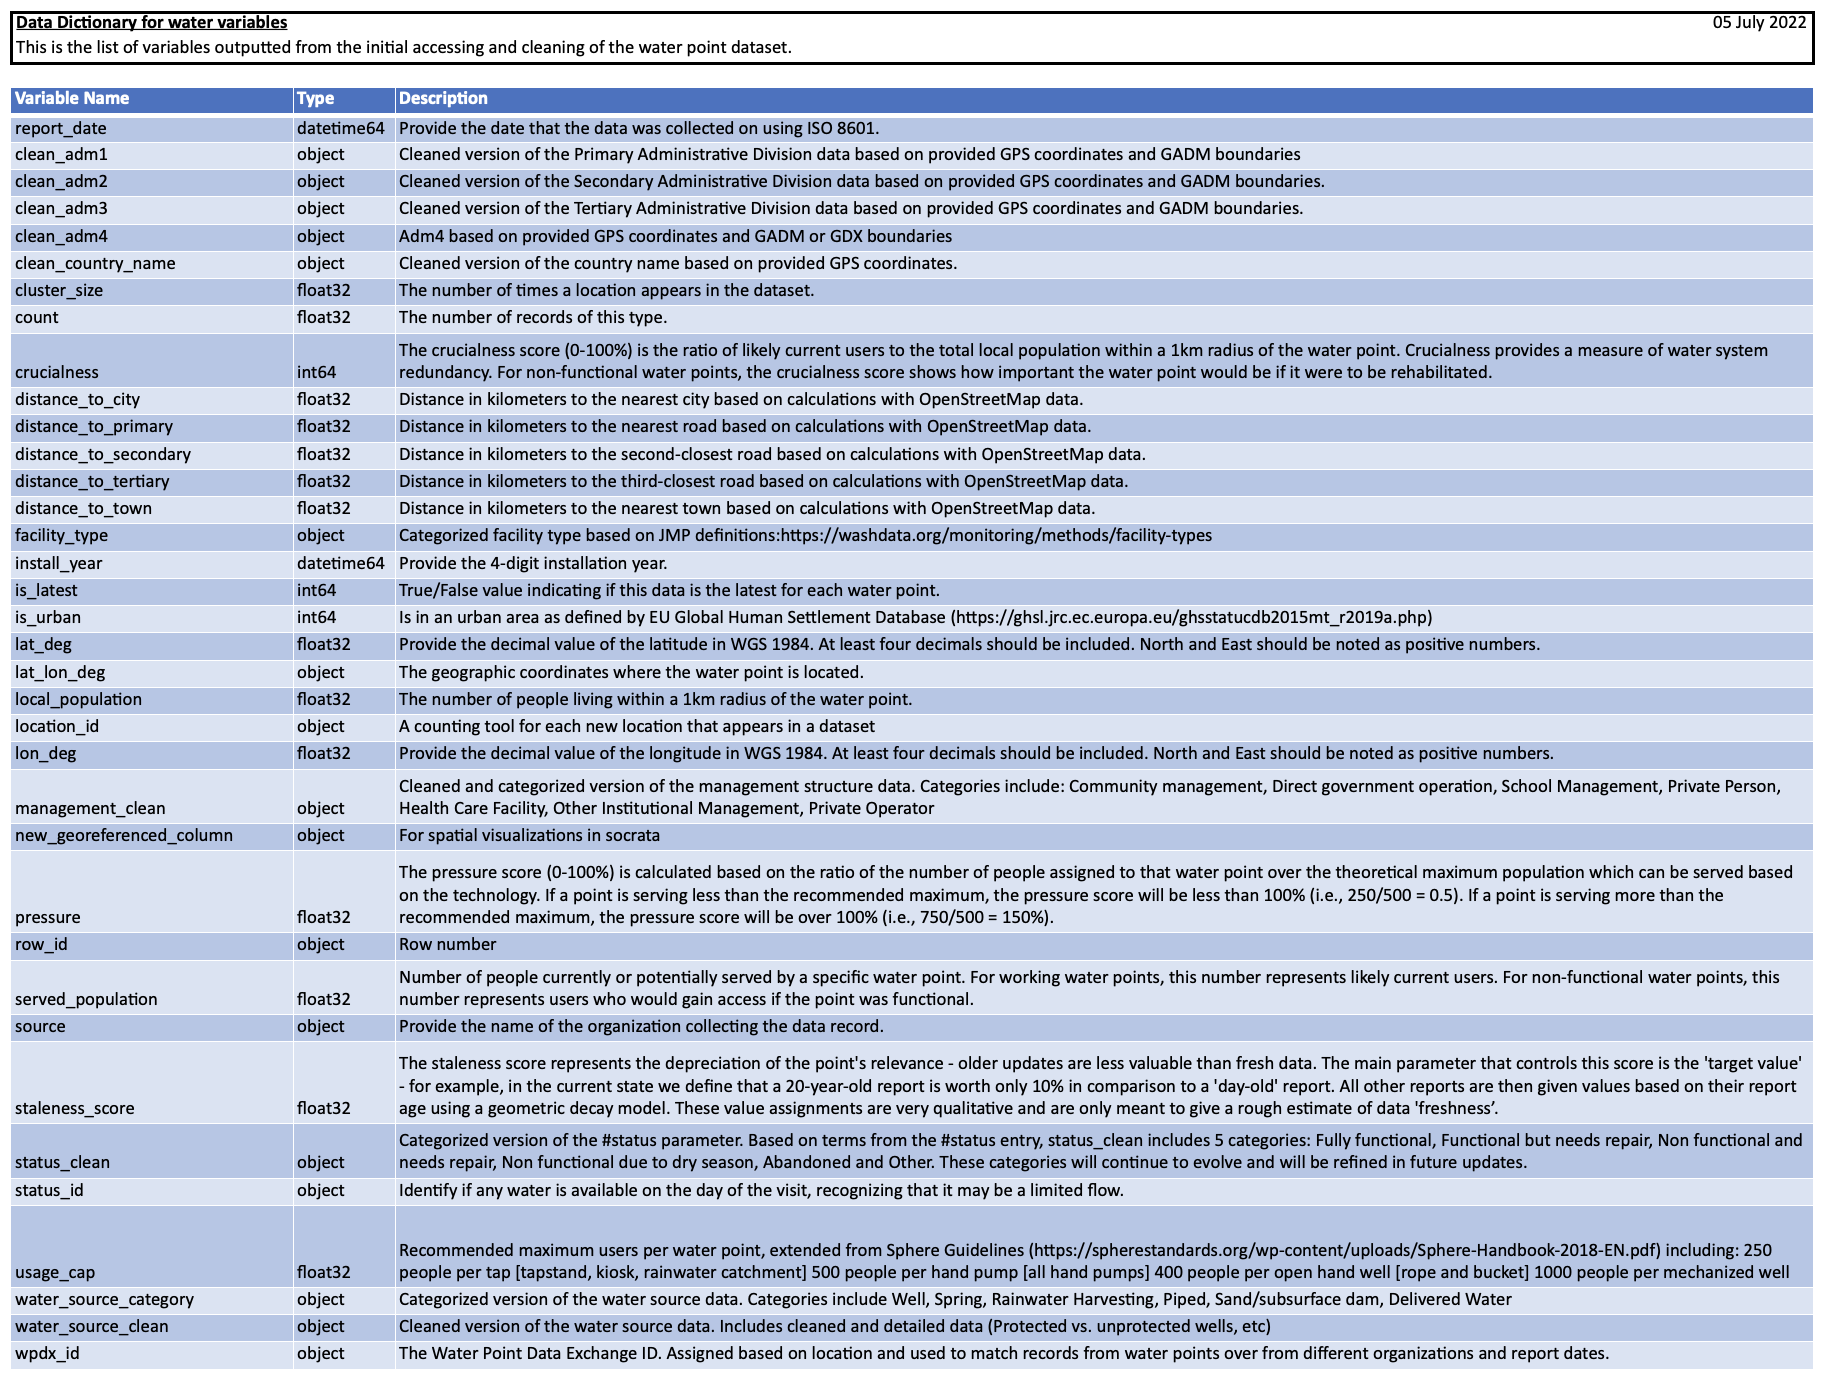

In [40]:
#data dictionary
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/1A-Water-Dictionary.png")

In [41]:
'''
#DEPRECATED-MANUAL WAY TO GET THE MEDIAN FOR EVERY REGION AND FILL NAs

#constructing columns of interest
median_columns_adm1=list(cols_to_impute )
median_columns_adm1.append('clean_adm1')

#group by adm2, with median
median_adm1=uganda_water_df_clean[median_columns_adm1].groupby('clean_adm1').median()
median_adm1.reset_index(inplace=True)

#merge median dataset with original dataset
uganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm1, how='left',\
                               left_on=uganda_water_df_clean['clean_adm1'],\
                               right_on=median_adm1['clean_adm1'], suffixes=(None, '_median_adm1'))

#fill null values with the median value of its region (adm2)
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean\
                                                                   [f'{col}_median_adm1'])
#removing key column resulting from the merge
del uganda_water_df_clean[uganda_water_df_clean.columns[0]]
uganda_water_df_clean.head()

#check remaining null values
uganda_water_df_clean.isna().sum()
'''

"\n#DEPRECATED-MANUAL WAY TO GET THE MEDIAN FOR EVERY REGION AND FILL NAs\n\n#constructing columns of interest\nmedian_columns_adm1=list(cols_to_impute )\nmedian_columns_adm1.append('clean_adm1')\n\n#group by adm2, with median\nmedian_adm1=uganda_water_df_clean[median_columns_adm1].groupby('clean_adm1').median()\nmedian_adm1.reset_index(inplace=True)\n\n#merge median dataset with original dataset\nuganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm1, how='left',                               left_on=uganda_water_df_clean['clean_adm1'],                               right_on=median_adm1['clean_adm1'], suffixes=(None, '_median_adm1'))\n\n#fill null values with the median value of its region (adm2)\nfor col in cols_to_impute:\n    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean                                                                   [f'{col}_median_adm1'])\n#removing key column resulting from the merge\ndel uganda_water_df_clean[